# 05 - Taming Text - Exercise 1

In [9]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Generating a Wordcloud

In [10]:
from wordcloud import WordCloud

For this first part, we simply get all the emails from the CSV file (more specifically the ExtractedSubject and the ExtractedBodyText of each email). Afterwards, we create a long raw text with all the content of the subject and the body of the emails concatenated.

In [11]:
path_emails = 'hillary-clinton-emails/Emails.csv'

emails = pd.read_csv(path_emails, usecols=['ExtractedSubject', 'ExtractedBodyText'])
emails.fillna(' ', inplace = True)
emails['subject_body'] = emails['ExtractedSubject'] + ' ' + emails['ExtractedBodyText']
emails_raw = np.asarray(emails['subject_body'])

# concatenate all emails in one string
emails_raw_text = ' '.join(np.array(emails['subject_body']))

We now use this raw corpus to create the **word cloud image**. The image contains the most common words in the corpus.

Since we got the raw content of emails, we can observe that words like *Re*, *FW*, *FYI* or even *am* and *pm* are present in the image: these are small words and abbreviations often used when writing emails. Indeed, they have a specific meaning in this context. 

However, we would like to have a word cloud that gives a more insightful idea of the topics and of the real content of the emails. In order to do that, some text pre-processing must take place.

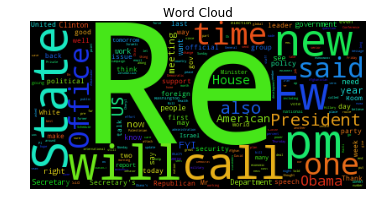

In [12]:
# generate wordcloud on the raw corpus
wordcloud_raw = WordCloud().generate(emails_raw_text)

# display the generated image
plt.imshow(wordcloud_raw)
plt.axis('off')
plt.title('Word Cloud')
plt.show()

### Text Pre-Processing Pipeline

In [13]:
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords

##### RUN ONLY ONCE #####
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

We start by the tokenization of the raw corpus, this way we can analyze each token separately. The other steps in the pre-processing pipeline consist of:
- removing all the tokens that are digits/numbers
- normalizing the tokens (all lowercase)
- removing all the stopwords (dependent on the language, in this case, English) and words that are common in this context (words/abbreviations related to emails)

The stopwords used are those provided by the NLTK library.

In [14]:
# tokenization
tokens = regexp_tokenize(emails_raw_text, pattern='\w+')

# removal of numbers and digits
tokens = [token for token in tokens if token.isdigit() == False]

# normalization
lowercase_tokens = [token.lower() for token in tokens]

# list of English stopwords
stop_words = set(stopwords.words('english'))

# list of words related to emails
stopwords_emails = ['fyi', 'fm', 'am', 'pm', 'n\'t', 'sent', 'from', 'to', 'subject', 'fw', 'fwd', 'fvv',
                    'cc', 'bcc', 'attachments', 're', 'date', 'html', 'php']
stop_words.update(stopwords_emails)

# stopwords removal
filtered_tokens = [token for token in lowercase_tokens if token not in stop_words]

In order to refine the tokens and to extract their basic form, we will use **lemmatization**. This consists in transforming a word to its singular and easiest form. For example, the words *church* and *churches* correspond to the same concept but have different forms. After applying lemmatization on these 2 words, we will get the token *church* twice.

Now that we have all the tokens in the most standard form, we remove those that have less than 2 characters: single characters tend not to represent meaningful topics.

We can then concatenate all the tokens in a long *string*, just as we did for the previous case.

In [15]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
lemmatized = [wnl.lemmatize(token.lower()) for token in filtered_tokens]

# remove tokens that are too short
clean_tokens = [token for token in lemmatized if len(token) > 1]

# concatenate all tokens in one string
emails_clean_text = ' '.join(lemmatized)

We use the same steps to create the **word cloud image**. The result is much more interesting this time since the represented words are more meaningful and tend to be connected with real topics.

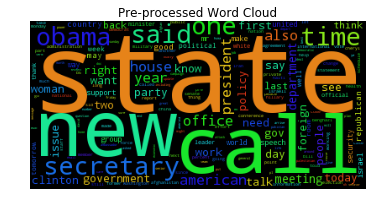

In [16]:
# generate wordcloud after pre-processing the text
wordcloud_clean = WordCloud().generate(emails_clean_text)

# display the wordcloud
plt.imshow(wordcloud_clean)
plt.axis('off')
plt.title('Pre-processed Word Cloud')
plt.show()